ValueError: could not convert string to float: 'Value'

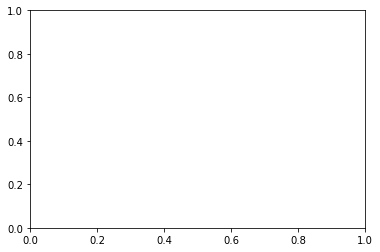

In [5]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
import math
import os
import torch
import torch.distributions.constraints as constraints
import pyro
from pyro.optim import Adam
from pyro.infer import SVI, Trace_ELBO
import pyro.distributions as dist
series = read_csv('datipml.csv', header=0, index_col=0)
plot_acf(series)
pyplot.savefig('/data/progettopml/acf.png')
print(series)

SyntaxError: unexpected character after line continuation character (3325844940.py, line 1)

AssertionError: 

In [26]:
x=read_csv('datipml.csv', header=0,names=["Date","Data"])
temp=x.Data
print(temp)
data=[]
for i in temp:
    data.append(torch.tensor(temp[i],dtype=torch.float64))
print(data)

def model(data):
    z=torch.zeros(len(data))
    k=torch.tensor(2.)
    #k=pyro.param(torch.tensor(1.),constraint=constraints.positive)
    for i in range(len(data)):
        if i==0:
            z[i]=pyro.sample("weiner_{}".format(i),dist.Normal(0,1))
        else:
            z[i]=pyro.sample("weiner_{}".format(i),dist.Normal(z[i-1],1))
        pyro.sample("obs_{}".format(i), dist.Bernoulli(torch.exp(-z[i]**2/(2*k))), obs=data[i])

def guide(data):
    # register the two variational parameters with Pyro.
    alpha_q = pyro.param("alpha_q", torch.tensor(0.))
    beta_q = pyro.param("beta_q", torch.tensor(1.))
    # sample latent_fairness from the distribution Beta(alpha_q, beta_q)
    pyro.sample("latent_fairness", dist.Normal(alpha_q, beta_q))

# set up the optimizer
adam_params = {"lr": 0.0005, "betas": (0.90, 0.999)}
optimizer = Adam(adam_params)

# setup the inference algorithm
svi = SVI(model, guide, optimizer, loss=Trace_ELBO())
data=x
n_steps = 5000
# do gradient steps
for step in range(n_steps):
    svi.step(data)


0      1
1      1
2      0
3      0
4      0
      ..
290    0
291    1
292    0
293    0
294    1
Name: Data, Length: 295, dtype: int64
[tensor(1., dtype=torch.float64), tensor(1., dtype=torch.float64), tensor(1., dtype=torch.float64), tensor(1., dtype=torch.float64), tensor(1., dtype=torch.float64), tensor(1., dtype=torch.float64), tensor(1., dtype=torch.float64), tensor(1., dtype=torch.float64), tensor(1., dtype=torch.float64), tensor(1., dtype=torch.float64), tensor(1., dtype=torch.float64), tensor(1., dtype=torch.float64), tensor(1., dtype=torch.float64), tensor(1., dtype=torch.float64), tensor(1., dtype=torch.float64), tensor(1., dtype=torch.float64), tensor(1., dtype=torch.float64), tensor(1., dtype=torch.float64), tensor(1., dtype=torch.float64), tensor(1., dtype=torch.float64), tensor(1., dtype=torch.float64), tensor(1., dtype=torch.float64), tensor(1., dtype=torch.float64), tensor(1., dtype=torch.float64), tensor(1., dtype=torch.float64), tensor(1., dtype=torch.float64), tens

KeyError: 0